# Lab 02 &mdash; Python Libraries &mdash; solution tips


1. Load the *CDC's BRFSS* survey data into a pandas dataframe and generate a (non-random) sample by selecting the first 400 observations (*tip:* generate a new dataframe out of the slice). Make a scatterplot of weight (`weight`) vs desired weight (`wtdesire`)
    * Describe the statistical relationship betweeen the two variables

   weight  wtdesire
0     175       175
1     125       115
2     105       105
3     132       124
4     150       130


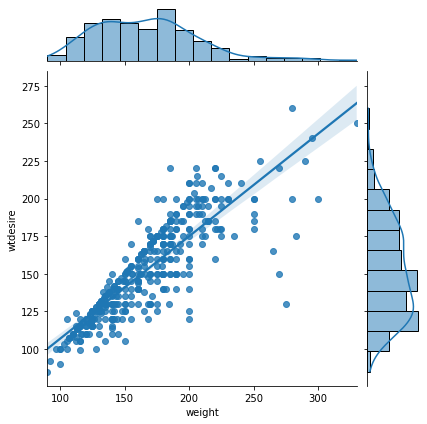

In [10]:
# code for exercise 1
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Solution
# Loading data and slicing it 
data = pd.read_csv("cdc.csv")
df = data.iloc[0:400]

# Constructing a dataframe using dataframe Constructor
vs_weight = pd.DataFrame(df, columns = ['weight', 'wtdesire'])
print(vs_weight.head())

# Plotting
sns.jointplot(x="weight", y="wtdesire", data=vs_weight, kind='reg')
plt.show()
# after loading the data into a panda dataframe
#   you can select the first 400 observations using e.g. the iloc function.
# then you construct a dataframe out of this slice 
#   (by just passing it into the Dataframe constructor)
# then, you can use seaborn's jointplot function to plot the data

2. Add in your sample a new variable called `wdiff`, defined as the difference between desired weight and actual weight. Plot a frequency histogram for `wdiff` and report summary statistics
    * Describe what it means for `wdiff` to be equals to/below/above 0
    * What do the shape of the histogram and statistics tell us about how people feel about their weight?

     weight  wtdesire  wdiff
0       175       175      0
1       125       115     10
2       105       105      0
3       132       124      8
4       150       130     20
..      ...       ...    ...
395     185       185      0
396     200       200      0
397     200       200      0
398     175       160     15
399     130       110     20

[400 rows x 3 columns]


C:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


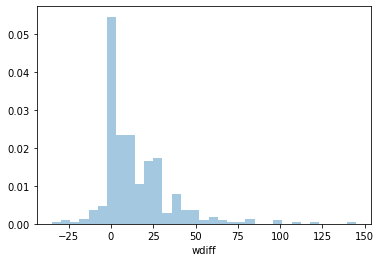

In [17]:
# code for exercise 2

# Solution

wdiff = vs_weight.weight - vs_weight.wtdesire
#print(wdiff)
vs_weight['wdiff'] = wdiff
print(vs_weight)

sns.distplot(vs_weight.wdiff, kde=False, norm_hist=True)
plt.show()
# we want to compute the difference between two columns of our dataframe
# so we can just do my_sample.column1 - my_sample.column1 
#  (replace with correct column names)
# the resulting column (Series) can be added back to the dataframe 
#   e.g. using the syntax my_sample['new_column_name'] = new_column
# for the frequency histogram you can use e.g. sns.distplot

3. Using your sample, construct a contingency table for variables `gender` and `smoke100`
    * Compute the difference $P(smoke100=1 \mid gender=m) - P(smoke100=1 \mid gender=f)$

In [48]:
# code for exercise 3
# solution


data_crosstab = pd.crosstab(data['smoke100'], 
                            data['gender'],
                                normalize = True, margins = True)
print(data_crosstab)
# to construct a contigency table, we know we can use pd.crosstab
# it's convenient to set options normalize=True, margins=True 
#   so that we have already probabilities (rather than counts) and marginals, 
#   which we need to compute those conditionals probabilities
# then, after constructing this table, you can select the relevant elements 
#   needed for computing the conditional probs, by using e.g. loc or iloc

gender          f        m      All
smoke100                           
0         0.30060  0.22735  0.52795
1         0.22095  0.25110  0.47205
All       0.52155  0.47845  1.00000


4. Recall the CPU benchmarks example of Chapter 03, part 6, where the multi-core (MC) processor ratings in the market follow the distribution $\mathcal{N}(90000,10000^2)$. Denote with $X$ the corresponding random variable. Assume two new processors *CPU_l* (lower-end) and *CPU_h* (higher-end) are launched into the market, and that they obtain ratings $X_l=100000$ and $X_h=120000$, respectively. 
    * Compute the z scores for $X_l$ and $X_h$ 
    * Compute the probabilities that 
        * A pre-existing MC processor performs better than *CPU_h* (i.e., $P(X > X_h)$)
        * A pre-existing MC processor performs in-between *CPU_l* and *CPU_h*


In [30]:
# code for exercise 4
import numpy as np
from scipy import stats

# Solution
mu = 90000
stdev = 10000
X_l = 100000
X_h = 120000

zscore_Xl = (X_l - mu)/stdev
zscore_Xh = (X_h - mu)/stdev

print("Z-Scores :", zscore_Xl,zscore_Xh)

p_Xl = stats.norm.cdf(zscore_Xl)
p_Xh = stats.norm.cdf(zscore_Xh)

#print(p_Xl,p_Xh)

p_gXh = 1 - p_Xh
print("P(X>Xh) :", p_gXh)

p_Xlh = p_Xh - p_Xl
print("P(X_l<=X<=X_h) :", p_Xlh)
# by now, you should know how to compute z scores of X_l and X_h

# first probability, P(X>X_h), can  be computed as 1-P(X<=X_h) 
#   where the second term is given by the cdf function
# here you have two options:
#   use stats.norm(mu,stdev) and check cdf at X_h
#   or directly the standard normal stats.norm and check cdf at the z score of X_h

# second probability P(X_l<=X<=X_h) is as per above but for
#    P(X_l<=X<=X_h)=P(X<=X_h)-P(X<=X_l)

Z-Scores : 1.0 3.0
P(X>Xh) : 0.0013498980316301035
P(X_l<=X<=X_h) : 0.15730535589982697


5. What's the expected value and variance of the volume of a sphere with random radius $\sim \mathcal{N}(0.5,0.1^2)$ cm?

In [39]:
# code for exercise 5

# Solution
from random import seed
from random import random
mu = 0.5
stdev = 0.1
my_norm = stats.norm(loc=mu, scale=stdev)
seed(42)
r = random()
print("radius:", r)
vol= lambda r: (4/3)*3.14*(r**3) #volume of a sphere
print("Volume:", vol(r))
print(my_norm.expect(vol))
print(my_norm.var())
print(my_norm.mean())
# volume of a sphere is given by the function (4/3)*np.pi*r**3, where r is the radius
# recall that the expected value of any function is the probability-weighted sum/integral of the function values
# so, we can invoke scipy.stats expect(fun) function, by passing in input the 'volume' function 
#  (see lab notebook for a similar example)

# once we know the mean, we can derive variance in a similar way, by noting that variance of a function is 
#   the probability-weighted sum/integral of the squared deviations between function values and function expectation
#   again, the lab notebook includes a very similar example

# also note that the mean is not simply (4/3)*np.pi*\mu**3, because E[X^3] is not equal to (E[X])^3!!!

radius 0.6394267984578837
1.0945633080782202
0.5861333333333334
0.010000000000000002
0.5
